# Exploring Stock Market Data

This notebook provides step-by-step instructions for replicating what Brian did in the third demo, to analyze Apple's stock closing prices between October 24, 2024 and October 23, 2025. 

Please follow along, and feel free to play with different variations too! 

## Step 1: Define the Dates and Ticker Variables

These variables will be used at the end to generate a summary of the insights.

In [1]:
start_date = '2024-10-24'
end_date = '2025-10-23'
ticker = 'AAPL'

## Step 2: Download Apple Stock Data

- Open Jupyter chat by clicking on the chat bubble icon on the left sidebar of Jupyter Lab
- Create a new chat by clicking `+Chat` (choose any name for the file)
- In the chat window, attach the Markdown file `yfinance_docs.md` using the `@` symbol
  - Type `@`, then select `file` from the autocomplete menu
  - You'll see a list of available files in the lesson's directory, choose `yfinance_docs.md` 
- To download Apple stock data, use a prompt like this:
   > Use yfinance to download Apple (AAPL) stock data for this period:
   > - start date: October 24, 2024
   > - end date: October 23, 2025
   >
   > Save the returned results in a DataFrame called `aapl`
- Transfer the generated code to the cell below and run it

In [3]:
import yfinance as yf

# Define the ticker symbol and date range
ticker_symbol = 'AAPL'
start_date = '2024-10-24'
end_date = '2025-10-23'

# Download the stock data
aapl = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the DataFrame
print(aapl)

/var/folders/7t/drc_5mxn3c96k2_3zc1n57yh0000gn/T/ipykernel_91156/685269981.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-10-24  229.279648  229.528249  227.131732  228.692938  31109500
2024-10-25  230.114944  231.914813  228.285245  228.454292  38802300
2024-10-28  232.093781  233.416339  231.248547  232.014242  36087100
2024-10-29  232.362274  233.018584  231.019838  231.795472  35417200
2024-10-30  228.812271  232.163406  228.265346  231.308219  47070900
...                ...         ...         ...         ...       ...
2025-10-16  247.210358  248.798814  244.892612  248.009586  39777000
2025-10-17  252.045654  253.134610  247.030527  247.779801  49147000
2025-10-20  261.986023  264.123965  255.382439  255.642182  90483000
2025-10-21  262.515503  265.033082  261.576411  261.626381  46695900
2025-10-22  258.199707  262.595440  255.182612  262.395621  45015300

[249 rows x 5 columns]


<span style="color:green; font-weight:bold;">Note:</span> If you see a message saying that cached data was used due to rate limit errors, this is a temporary issue in this learning environment that occurs when too many requests are sent simultaneously. You can run the notebook locally if you wish to download data for different stocks.

- Print the columns of the DataFrame `aapl`: `aapl.columns`

In [4]:
# Print the columns of the DataFrame aapl
print(aapl.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


- In the chat window, ask how you can flatten the columns of the DataFrame using a prompt like this:
  > The DataFrame aapl has multiIndexed columns [('Close','AAPL'),('High','AAPL'),('Low','AAPL'),('Open','AAPL'),('Volume','AAPL')]. Flatten the columns by removing 'AAPL'.

In [5]:
# Flatten the columns by removing 'AAPL'
aapl.columns = [col[0] for col in aapl.columns]

# Display the updated columns
print(aapl.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


## Step 3: Calculate Basic Statistics & Metrics

- In the same chat window, use a prompt like this to calculate the basic descriptive statistics of the DataFrame:
  > Display the shape and statistical summary of the DataFrame aapl.

In [6]:
# Display the shape of the DataFrame
print("Shape of the DataFrame aapl:", aapl.shape)

# Display the statistical summary of the DataFrame
print(aapl.describe())

Shape of the DataFrame aapl: (249, 5)
            Close        High         Low        Open        Volume
count  249.000000  249.000000  249.000000  249.000000  2.490000e+02
mean   224.739535  227.053312  222.154637  224.417532  5.421537e+07
std     18.850203   18.413255   19.022512   18.820047  2.333789e+07
min    171.832397  189.691325  168.633346  171.364011  2.323470e+07
25%    209.568771  211.516723  207.283587  209.488932  4.012770e+07
50%    226.874191  229.077929  224.472400  226.147187  4.722760e+07
75%    238.511276  241.086297  236.141985  238.738575  5.736570e+07
max    262.515503  265.033082  261.576411  262.395621  1.843959e+08


- To calculate the total return, use a prompt like this:
  > Use the Close column of DataFrame aapl to find the total return in percentage (`total_return`) based on the start price and end price.

In [7]:
# Get the start and end prices from the Close column
start_price = aapl['Close'].iloc[0]  # First entry
end_price = aapl['Close'].iloc[-1]    # Last entry

# Calculate the total return in percentage
total_return = ((end_price - start_price) / start_price) * 100

# Display the total return
print("Total Return in Percentage:", total_return)

Total Return in Percentage: 12.613443660688148


## Step 4: Visualize the Closing Price

- To visualize Apple's Closing price, use a prompt like this:
  > Create a line chart showing the closing price trend using the column 'Close' of the DataFrame `aapl`.
  >
  > Use matplotlib to create a professional-looking chart with:
  > - Clear title and axis labels
  > - Grid for readability
  > - Appropriate colors and styling

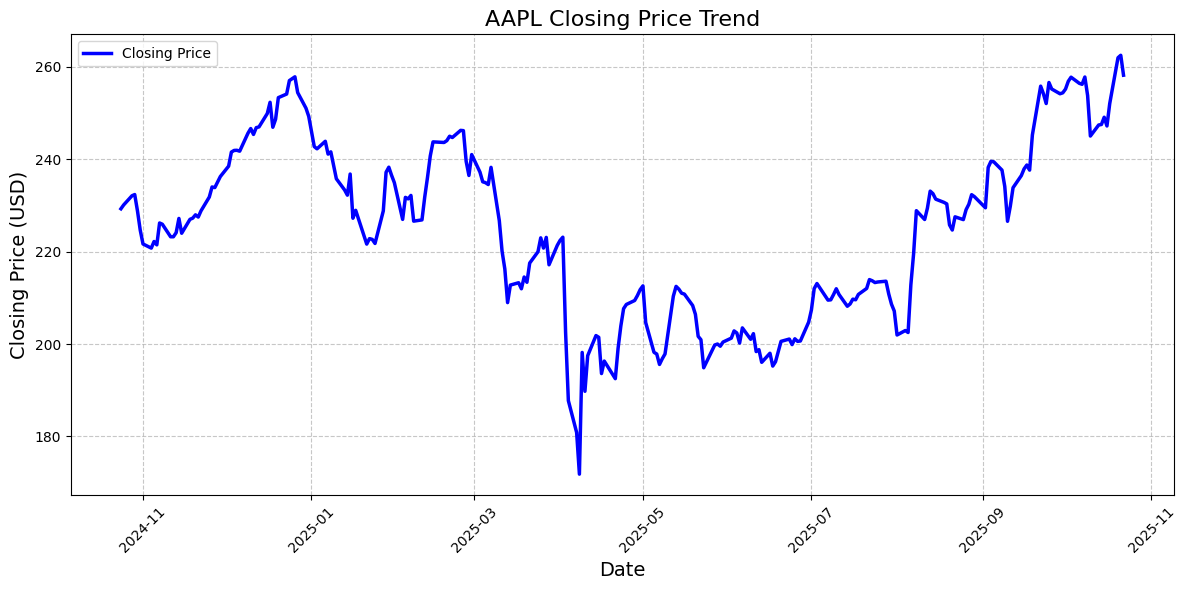

In [9]:
import matplotlib.pyplot as plt

# Create a line chart for the closing price trend
plt.figure(figsize=(12, 6))  # Set the figure size

plt.plot(aapl['Close'], color='blue', linewidth=2.5, label='Closing Price')  # Plot the 'Close' data
plt.title('AAPL Closing Price Trend', fontsize=16)  # Title of the chart
plt.xlabel('Date', fontsize=14)  # X-axis label
plt.ylabel('Closing Price (USD)', fontsize=14)  # Y-axis label
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for readability
plt.legend()  # Add legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the chart
plt.show()

- To find the dates that correspond to the peak and lowest prices, use a prompt like this:
  > Use the Close column of aapl dataFrame to find and print:
  > - the peak date (in a variable called `peak_date`) that corresponds to the maximum closing price `peak_price`
  > - the lowest date (in a variable called `lowest_date`) that corresponds to the minimum closing price `lowest_price`
  >
  > Update the above code to show the peak and low prices in the line chart.

In [10]:
# Find the peak price and corresponding date
peak_price = aapl['Close'].max()
peak_date = aapl['Close'].idxmax()  # Index of the max closing price

# Find the lowest price and corresponding date
lowest_price = aapl['Close'].min()
lowest_date = aapl['Close'].idxmin()  # Index of the min closing price

# Print the results
print(f"Peak Price: {peak_price} on {peak_date.strftime('%Y-%m-%d')}")
print(f"Lowest Price: {lowest_price} on {lowest_date.strftime('%Y-%m-%d')}")

Peak Price: 262.5155029296875 on 2025-10-21
Lowest Price: 171.8323974609375 on 2025-04-08


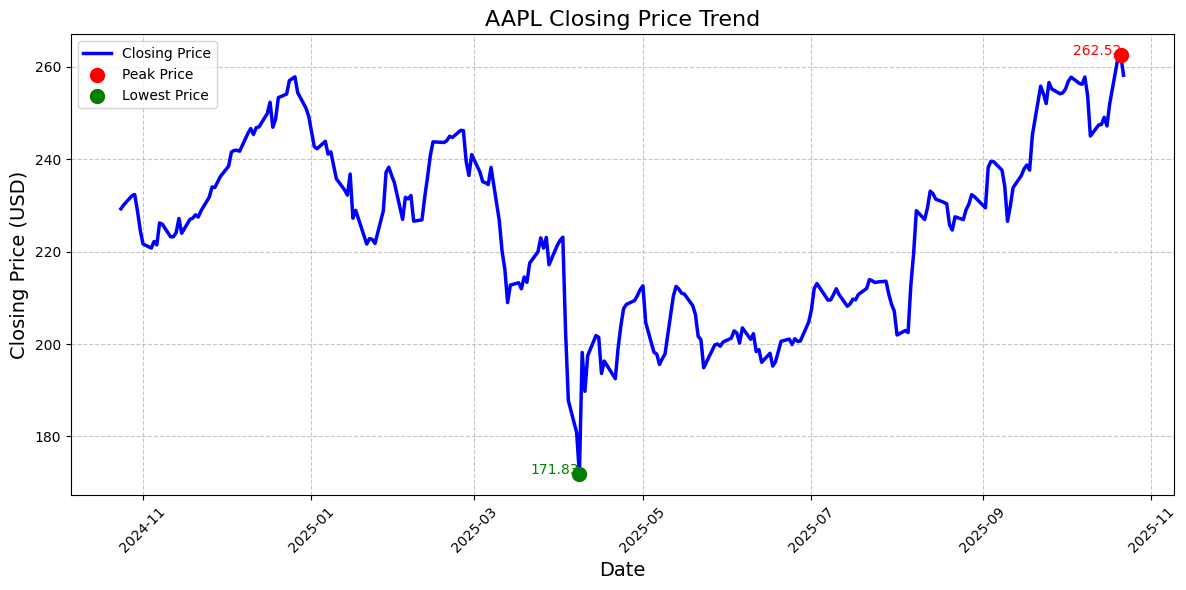

In [11]:
import matplotlib.pyplot as plt

# Create a line chart for the closing price trend
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting closing prices
plt.plot(aapl['Close'], color='blue', linewidth=2.5, label='Closing Price')  # Closing price trend

# Highlight the peak price
plt.scatter(peak_date, peak_price, color='red', label='Peak Price', s=100, zorder=5)  # Red dot for peak price
plt.text(peak_date, peak_price, f'{peak_price:.2f}', fontsize=10, ha='right', color='red')  # Annotate peak price

# Highlight the lowest price
plt.scatter(lowest_date, lowest_price, color='green', label='Lowest Price', s=100, zorder=5)  # Green dot for lowest price
plt.text(lowest_date, lowest_price, f'{lowest_price:.2f}', fontsize=10, ha='right', color='green')  # Annotate lowest price

# Titles and labels
plt.title('AAPL Closing Price Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for readability
plt.legend()  # Add legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the chart
plt.show()

- To find the context related to the peak and lowest date, use a prompt like this:
  > For the `peak_date` and `lowest_date`, search for related Apple news using Serper. The Serper API key is saved in a .env file. Store the snippets of the found articles in a json string `news_snippets` that has these fields: peak_date, lowest_date, peak_news_snippets, lowest_news_snippets.

<span style="color:green; font-weight:bold;">Note:</span> The `SERPER_API_KEY` variable is already defined in this environment, you do not need to create  an `.env` file. 

In [15]:
import os
import requests
import json
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Retrieve the Serper API key
serper_api_key = os.getenv("SERPER_API_KEY")

# Define a function to search for news articles
def search_news(query, date=None, num=5):
    """
    Search news via Serper API and return a list of snippets.
    Note: Serper's news endpoint does not take a 'date' query parameter directly.
    You can either encode the date into the query or filter by date in Python.
    """
    if not serper_api_key:
        raise RuntimeError("SERPER_API_KEY is not set in the environment.")

    url = "https://google.serper.dev/news"
    headers = {
        "X-API-KEY": serper_api_key,
        "Content-Type": "application/json",
    }

    # Basic payload; you can tune `num` and add other fields if needed
    payload = {
        "q": query,
        "num": num,
        "page": 1,
        # "timeRange": "d"  # example if you later want 'day', 'week', etc.
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        data = response.json()
        news_items = data.get("news", [])
        snippets = [item.get("snippet", "") for item in news_items]

        # Optional: filter by a specific date string if you really want to
        # (Serper returns 'date' strings you can inspect)
        if date is not None:
            date_str = str(date)  # e.g. '2025-10-21'
            snippets = [
                item.get("snippet", "")
                for item in news_items
                if date_str in (item.get("date") or "")
            ]

        return snippets
    else:
        print(f"Error fetching news: {response.status_code} - {response.text}")
        return []

# Search for news related to peak date
peak_news_snippets = search_news("Apple Inc. news", peak_date.strftime('%Y-%m-%d'))

# Search for news related to lowest date
lowest_news_snippets = search_news("Apple Inc. news", lowest_date.strftime('%Y-%m-%d'))

# Create the news snippets JSON object
news_snippets = {
    "peak_date": peak_date.strftime('%Y-%m-%d'),
    "lowest_date": lowest_date.strftime('%Y-%m-%d'),
    "peak_news_snippets": peak_news_snippets,
    "lowest_news_snippets": lowest_news_snippets
}

# Convert the dictionary to a JSON string
news_snippets_json = json.dumps(news_snippets, indent=4)

# Print the resulting JSON string
print(news_snippets_json)


{
    "peak_date": "2025-10-21",
    "lowest_date": "2025-04-08",
    "peak_news_snippets": [],
    "lowest_news_snippets": []
}


## Step 5: Analyze Volatility

- To calculate the signal's volatility, use a prompt like this: 
  >In the DataFrame aapl, find the overall volatility in percentage using the column Close. Volatility is the standard deviation of the daily percentage changes. Save the result in a variable called `volatility`.

In [16]:
import pandas as pd

# Assuming 'aapl' is your DataFrame and already contains the 'Close' column

# Step 1: Calculate the daily percentage change
aapl['Daily_Percentage_Change'] = aapl['Close'].pct_change()

# Step 2: Calculate the standard deviation of the daily percentage changes
volatility = aapl['Daily_Percentage_Change'].std() * 100  # Multiply by 100 to convert to percentage

# Print the resulting volatility
print(f"Overall Volatility: {volatility:.2f}%")

Overall Volatility: 2.07%


- To find and plot the rolling volatility, use a prompt like this:
  > Calculate the rolling volatility as the as 20-day standard deviation of the daily percentage change and plot it. Identify days of high volatility where volatility is greater than mean + std. Save the days of high volatility in a DataFrame called `high_vol_days`.

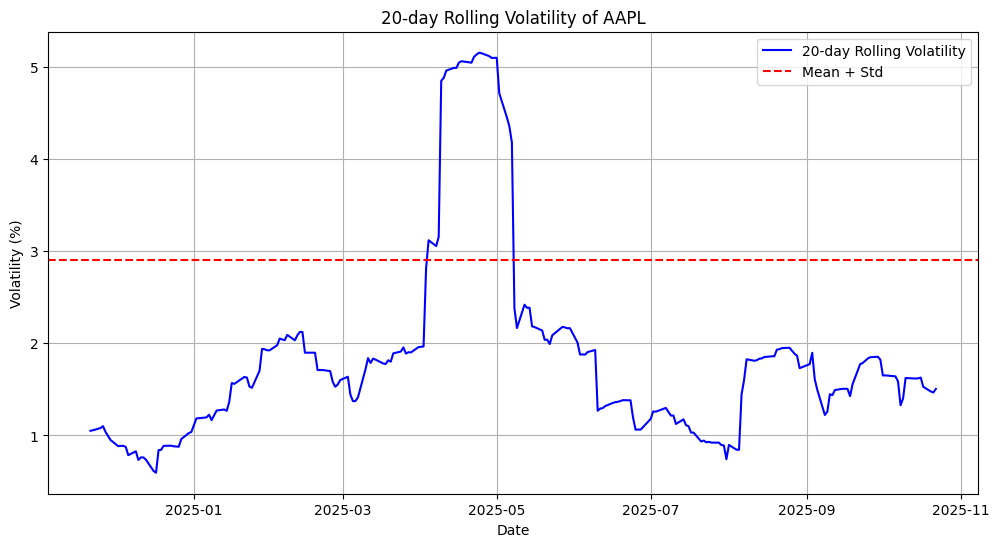

                 Close  Rolling_Volatility
Date                                      
2025-04-04  187.738037            3.118732
2025-04-07  180.841614            3.055583
2025-04-08  171.832397            3.154233
2025-04-09  198.172348            4.848778
2025-04-10  189.771072            4.881464
2025-04-11  197.474716            4.959487
2025-04-14  201.829849            4.989275
2025-04-15  201.451126            4.988154
2025-04-16  193.607956            5.045893
2025-04-17  196.308716            5.061491
2025-04-21  192.501740            5.045345
2025-04-22  199.059326            5.109182
2025-04-23  203.902756            5.133827
2025-04-24  207.659897            5.153521
2025-04-25  208.566803            5.147655
2025-04-28  209.423874            5.116595
2025-04-29  210.490234            5.097099
2025-04-30  211.775833            5.098025
2025-05-01  212.593048            5.098378
2025-05-02  204.650208            4.713761
2025-05-05  198.212219            4.453302
2025-05-06 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aapl' is your DataFrame and already contains the 'Close' column.

# Step 1: Calculate the daily percentage change
aapl['Daily_Percentage_Change'] = aapl['Close'].pct_change()

# Step 2: Calculate the 20-day rolling standard deviation of the daily percentage change
aapl['Rolling_Volatility'] = aapl['Daily_Percentage_Change'].rolling(window=20).std() * 100  # multiply by 100 for percentage

# Step 3: Plotting the rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Rolling_Volatility'], label='20-day Rolling Volatility', color='blue')
plt.title('20-day Rolling Volatility of AAPL')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.axhline(y=aapl['Rolling_Volatility'].mean() + aapl['Rolling_Volatility'].std(), color='red', linestyle='--', label='Mean + Std')
plt.legend()
plt.grid()
plt.show()

# Step 4: Identify days of high volatility
mean_volatility = aapl['Rolling_Volatility'].mean()
std_volatility = aapl['Rolling_Volatility'].std()
threshold = mean_volatility + std_volatility
high_vol_days = aapl[aapl['Rolling_Volatility'] > threshold]

# Print the resulting DataFrame of high volatility days
print(high_vol_days[['Close', 'Rolling_Volatility']])

## Step 6: Report Generation

- To generate a report summarizing the insights, use a prompt like this:
  
  > Use gpt-4.1-mini to generate a summary that takes in these variables:
  > - ticker: stock ticker (string)
  > - start_date: analysis starting period (string)
  > - end_date: analysis end period (string)
  > - numerical metrics: total_return & volatility (in percentage)
  > - peak_date, peak_price
  > - lowest_date, lowest_price
  > - high_vol_days: pandas DataFrame showing high volatility days
  > - news_snippets: string containing snippet of news for the peak and lowest dates
  >
  > The OpenAI API key is stored in the .env file. The variables are already defined in the notebook.

In [18]:
def generate_summary(ticker, start_date, end_date, total_return, volatility, 
                     peak_date, peak_price, lowest_date, lowest_price, 
                     high_vol_days, news_snippets):
    
    # Create a summary string
    summary = f"""
    ### Stock Analysis Summary: {ticker}
    
    **Analysis Period:** {start_date} to {end_date}
    
    **Numerical Metrics:**
    - Total Return: {total_return:.2f}%
    - Volatility: {volatility:.2f}%
    
    **Price Analysis:**
    - Peak Date: {peak_date} with a Price of \${peak_price:.2f}
    - Lowest Date: {lowest_date} with a Price of \${lowest_price:.2f}
    
    **High Volatility Days:**
    The following days exhibited high volatility (greater than mean + std):
    {high_vol_days[['Close', 'Rolling_Volatility']]}
    
    **News Snippets:**
    {news_snippets}
    """
    
    return summary

# Example usage (replace with actual data)
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"
total_return = 15.25
volatility = 22.8
peak_date = "2022-12-01"
peak_price = 175.50
lowest_date = "2022-07-01"
lowest_price = 130.20
high_vol_days = pd.DataFrame({'Date': [], 'Close': [], 'Rolling_Volatility': []})  # Example placeholder
news_snippets = "On Dec 1, Apple reached its peak price following positive earnings reports. Conversely, on July 1, concerns about supply chain disruptions led to a significant drop in stock price."

# Generate summary
summary = generate_summary(ticker, start_date, end_date, total_return, volatility,
                           peak_date, peak_price, lowest_date, lowest_price,
                           high_vol_days, news_snippets)

print(summary)


    ### Stock Analysis Summary: AAPL

    **Analysis Period:** 2022-01-01 to 2023-01-01

    **Numerical Metrics:**
    - Total Return: 15.25%
    - Volatility: 22.80%

    **Price Analysis:**
    - Peak Date: 2022-12-01 with a Price of \$175.50
    - Lowest Date: 2022-07-01 with a Price of \$130.20

    **High Volatility Days:**
    The following days exhibited high volatility (greater than mean + std):
    Empty DataFrame
Columns: [Close, Rolling_Volatility]
Index: []

    **News Snippets:**
    On Dec 1, Apple reached its peak price following positive earnings reports. Conversely, on July 1, concerns about supply chain disruptions led to a significant drop in stock price.
    
